In [1]:
import pandas as pd
import numpy as np

# import necessary file
from datetime import datetime
from tqdm.notebook import tqdm, tnrange
tqdm.pandas(desc="Loading...")
import swifter

# Setting the pyecharts config
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

# Define pyecharts theme
from pyecharts.globals import ThemeType

# setting pyecharts' charts
from pyecharts.charts import Funnel, Bar, Line, Grid, TreeMap, Page, Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# setting plot
import matplotlib.pyplot as plt
import squarify

In [3]:
#importing all data
df = pd.read_csv('Data/UserBehavior.csv', header=None, parse_dates=True)
print('Loading Finished! The file length is {} rows'.format(len(df)))

Loading Finished! The file length is 100150807 rows


In [4]:
# 進行樣本取樣兩百萬筆
# df = df.sample(n=200000, random_state=0, axis=0)
# print('Sampling finished! The file length is %s' % len(df))

# 重新命名欄位
print('Renaming Columns...')
df.columns = ['User_Id', 'Item_Id', 'Category_Id', 'Behavior', 'Time']
print('Renamed column Finished...')

Renaming Columns...
Renamed column Finished...


In [9]:
# 轉換資料格式
print('Transforming the data type...')
df['Behavior'] = df.Behavior.astype('category')
df['User_Id'] = df.User_Id.astype('category')
df['Item_Id'] = df.Item_Id.astype('category')
df['Category_Id'] = df.Category_Id.astype('category')

Transforming the data type...


In [8]:
# 清洗超出時間範圍的數據
print('Filtering data...')
df['Time'] = pd.to_datetime(df['Time'], unit="s")
mask_1 = df['Time'] >= datetime(2017,11,25)
mask_2 = df['Time'] <= datetime(2017,12,3)
df = df[mask_1 & mask_2]
print('Filtering data Finished!')

Filtering data...
Filtering data Finished!


In [71]:
# 個別新增日期、小時與星期的欄位
print('Transforming the data to seperate column as Week and Hour')
df['Date'] = df.Time.dt.strftime("%Y-%m-%d").astype('category')
df['Hour'] = df.Time.dt.strftime("%H").astype('category')
df['Week'] = df.Time.dt.strftime("%A").astype('category')
print("Transforming Finished!")

# 處理多餘欄位並排序
df = df[['Date', 'Week', 'Hour', 'Time', 'User_Id', 'Item_Id', 'Category_Id', 'Behavior']]

Transforming the data to seperate column as Week and Hour
Transforming Finished!


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86953655 entries, 2 to 100150794
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   User_Id      category      
 1   Item_Id      category      
 2   Category_Id  category      
 3   Behavior     category      
 4   Time         datetime64[ns]
dtypes: category(4), datetime64[ns](1)
memory usage: 2.4 GB


In [11]:
# df.reset_index()
df.head(10)

,User_Id,Item_Id,Category_Id,Behavior,Time
2,1,2576651,149192,pv,2017-11-25 01:21:25
3,1,3830808,4181361,pv,2017-11-25 07:04:53
4,1,4365585,2520377,pv,2017-11-25 07:49:06
5,1,4606018,2735466,pv,2017-11-25 13:28:01
6,1,230380,411153,pv,2017-11-25 21:22:22
7,1,3827899,2920476,pv,2017-11-26 16:24:33
8,1,3745169,2891509,pv,2017-11-26 19:44:31
9,1,1531036,2920476,pv,2017-11-26 22:02:12
10,1,2266567,4145813,pv,2017-11-27 00:11:11
11,1,2951368,1080785,pv,2017-11-27 02:47:08


In [9]:
# 轉換資料型態至 datetime
# print("Transforming the Time column to datetime format...")
# df['Time'] = df['Time'].progress_apply(lambda timestamp: datetime.fromtimestamp(timestamp))

# df['Date'] = df['Time'].apply(lambda timestamp: timestamp.strftime("%Y-%m-%d"))
# df['Hour'] = df['Time'].apply(lambda timestamp: timestamp.strftime("%H"))
# df['Week'] = df['Time'].apply(lambda timestamp: timestamp.strftime("%A"))

----
# 淘寶用戶行為分析內容

In [8]:
# 用於讀取 Pyecharts 所需的 Javascript 文件
Bar().load_javascript()

### 縮減資料量

In [24]:
df_behav = df.loc[:, ['User_Id', 'Time', 'Behavior']]

In [25]:
df_behav['Date'] = df_behav.Time.dt.date
df_behav['Week'] = df_behav.Time.dt.week
df_behav['Hour'] = df_behav.Time.dt.hour

In [30]:
df_behav['Date'] = df_behav.Date.astype('category')
df_behav['Week'] = df_behav.Week.astype('category')
df_behav['Hour'] = df_behav.Hour.astype('category')

In [31]:
df_behav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86953655 entries, 2 to 100150794
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   User_Id   category      
 1   Time      datetime64[ns]
 2   Behavior  category      
 3   Date      category      
 4   Week      category      
 5   Hour      category      
dtypes: category(5), datetime64[ns](1)
memory usage: 2.0 GB


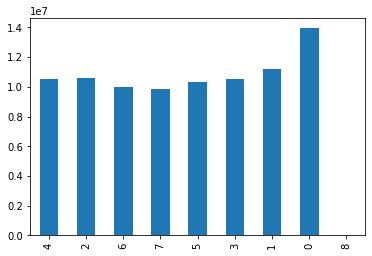

In [41]:
df_behav.Date.value_counts().reset_index().sort_values('index').Date.plot(kind='bar')

### 每日用戶活躍行為

In [42]:
df_date = df_behav.loc[:, ('User_Id', 'Date')]

In [46]:
act = df_date.groupby('Date')['User_Id'].nunique().reset_index()
# act = act.pivot_table(index='Date', values='User_Id', aggfunc=['count']).reset_index()

In [48]:
act.columns = ['Date', 'Count']
act

,Date,Count
0,2017-11-25,705571
1,2017-11-26,713522
2,2017-11-27,709207
3,2017-11-28,708339
4,2017-11-29,719356
5,2017-11-30,730809
6,2017-12-01,753166
7,2017-12-02,941709
8,2017-12-03,130


In [50]:
def daily_act():
    daily = act.Count.to_list()[:-1]
    week = act.Date.to_list()[:-1]
    line = (
        Line()
        .add_xaxis(week)
        .add_yaxis("活躍人數", daily)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="每日用戶活躍數"
            )
        )
    )
    return line
daily_act().render_notebook()

### 於 12-02 的活躍高點佔總活躍人數比

In [57]:
high_point = df_behav[df_behav['Date'] == "2017-12-02"].User_Id.nunique()
total_user = df_behav.User_Id.nunique()

In [56]:
print('活躍用戶佔比為：{:.2f}%'.format(100 * high_point / total_user))

活躍用戶佔比為：95.32%


In [58]:
high_point

941709

In [59]:
df_behav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86953655 entries, 2 to 100150794
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   User_Id   category      
 1   Time      datetime64[ns]
 2   Behavior  category      
 3   Date      category      
 4   Week      category      
 5   Hour      category      
dtypes: category(5), datetime64[ns](1)
memory usage: 2.0 GB


### 每週用戶行為變化：

In [61]:
def week_behav(col):
    '''
    先把日期過濾成一週，再把數據進行透視分析以取出各項數據。
    '''
    df_week = df_behav[(df_behav['Time'] >= pd.to_datetime("2017-11-26")) & (df_behav['Time'] < pd.to_datetime("2017-12-03"))]
    behavior = df_week.pivot_table(index="Date", columns="Behavior", aggfunc=['count']).iloc[:, :4]
    behavior.columns = ['buy', 'cart', 'fav', 'pv']
    behavior = behavior.reset_index()[col].to_list()
    return behavior

In [63]:
def week_chart():
    week_day = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
    bar = (
        Bar()
        .add_xaxis(week_day)
        .add_yaxis("購買量", week_behav("buy"), stack="stack_1", category_gap=60)
        .add_yaxis("購物車數量", week_behav("cart"), stack="stack_1", category_gap=60)
        .add_yaxis("我的最愛", week_behav("fav"), stack="stack_1", category_gap=60)
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=True)
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="用戶變化週期曲線"
            ),
            legend_opts=opts.LegendOpts(
                pos_top="5%"
            )
        )
    )
    
    line = (
        Line()
        .add_xaxis(week_day)
        .add_yaxis("瀏覽人次", week_behav("pv"))
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="用戶瀏覽人次",
                pos_top="48%",
            ),
            legend_opts=opts.LegendOpts(
                pos_top="50%"
            )
        )
    )
    
    # 把兩張表格合在一起
    grid = (
        Grid()
        .add(bar, grid_opts=opts.GridOpts(pos_bottom="60%"))
        .add(line, grid_opts=opts.GridOpts(pos_top="60%"))
    )
    
    return grid

week_chart().render_notebook()

KeyboardInterrupt: 

### 每天用戶行為變化：

In [13]:
def day_behav(date, col) -> list:
    '''
    選擇特定一天的數據來檢視該天的日期組成
    '''
    day = df_behav[df_behav['Date'] == date].pivot_table(index="Hour", columns="Behavior", aggfunc=['count']).iloc[:, :4]
    day.columns = ['buy', 'cart', 'fav', 'pv']
    hour = day.loc[:, col].to_list()
    return hour

In [51]:
def day_chart(date):
    hours = np.arange(24).tolist()
    bar = (
        Bar()
        .add_xaxis(hours)
        .add_yaxis("購買量", day_behav(date, 'buy'), stack="stack_1", category_gap=10)
        .add_yaxis("購物車數量", day_behav(date, 'cart'), stack="stack_1", category_gap=10)
        .add_yaxis("我的最愛", day_behav(date, 'fav'), stack="stack_1", category_gap=10)
        .set_series_opts(
            label_opts=opts.LabelOpts(is_show=False)
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="{} 用戶變化週期曲線".format(date)
            ),
            legend_opts=opts.LegendOpts(
                pos_top="5%"
            )
        )
    )
    
    line = (
        Line()
        .add_xaxis(hours)
        .add_yaxis("瀏覽人次", day_behav(date, 'pv'))
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="用戶瀏覽人次",
                pos_top="48%",
            ),
            legend_opts=opts.LegendOpts(
                pos_top="50%"
            )
        )
    )
    
    # 把兩張表格合在一起
    grid = (
        Grid()
        .add(bar, grid_opts=opts.GridOpts(pos_bottom="60%"))
        .add(line, grid_opts=opts.GridOpts(pos_top="60%"))
    )
    
    return grid

day_chart('2017-11-25').render_notebook();

## 產品銷售樹圖

### 銷售最佳排行

In [16]:
import json

# 設定搜尋資料庫
df_item = df[['Item_Id', 'Behavior']]

def search_item_sales(behavior_Type):
    # 篩選前 20 名的產品 ID
    behav = df_item[df_item['Behavior'] == behavior_Type]
    ranking = behav.groupby('Item_Id')['Behavior'].count().reset_index().sort_values('Behavior', ascending=False)
    top_twenty_rank = ranking.iloc[:20,:].reset_index(drop=True).to_dict()
    
    # 進行資料轉換並儲存成 list 型態以供 pyechart tree Map 使用
    item_list = []
    for rank in range(20):
        treemap = {}
        treemap['value'] = top_twenty_rank['Behavior'][rank]
        treemap['name'] = top_twenty_rank['Item_Id'][rank]
        item_list.append(treemap)
    
    return item_list

In [17]:
def item_ranking(Behavior_Type) -> TreeMap:
    data = [
        {
            "name": Behavior_Type,
            "children": search_item_sales(Behavior_Type),   
        }
    ]
    
    treemap = (
        TreeMap(
            init_opts=opts.InitOpts(theme="light")
        )
        .add("數量", data, is_selected=True, roam='move',
             label_opts=opts.LabelOpts(
                 position='inside'
             )   
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="產品銷售商品排行"
            )
        )
    )
    return treemap
item_ranking('buy').render_notebook()

In [18]:
# 顯示購物車排行
item_ranking('cart').render_notebook()

In [19]:
# 顯示我的最愛排行
item_ranking('fav').render_notebook()

In [20]:
# 顯示瀏覽次數排行
item_ranking('pv').render_notebook()

## RFM Model

In [43]:
# Tricky way to solve it
df_rfm = df.query('Behavior == "buy"').loc[:, ['User_Id', 'Time', 'Date']]
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87530 entries, 71 to 4999997
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   User_Id  87530 non-null  category      
 1   Time     87530 non-null  datetime64[ns]
 2   Date     87530 non-null  category      
dtypes: category(2), datetime64[ns](1)
memory usage: 3.4 MB


In [107]:
r_pivot = df_rfm.pivot_table(index="User_Id", values="Time", aggfunc=['max']).reset_index()
r_pivot.columns = ['d', 'Time']
r_pivot['R'] = (pd.to_datetime('2017-12-03') - r_pivot['Time']).dt.days
r_pivot = r_pivot[['d', 'R']]
r_pivot
r_pivot['d'] = r_pivot.d.astype('str')
r_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31176 entries, 0 to 31175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   d       31176 non-null  object
 1   R       31176 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


## F

In [96]:
f = df_rfm.pivot_table(index=['User_Id', 'Date'], values='Date', aggfunc=['count']).reset_index()
f.columns = ['Id', 'Date', 'Time']

f = f.pivot_table(index="Id", values='Time', aggfunc=['sum']).reset_index()
f.columns = ['d', 'F']
f = f[f['F'] > 0].reset_index(drop=True)

In [105]:
f['d'] = f.d.astype('str')
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31176 entries, 0 to 31175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   d       31176 non-null  object 
 1   F       31176 non-null  float64
dtypes: float64(1), object(1)
memory usage: 487.2+ KB


In [110]:
# 合併兩個表格
rfm = r.copy()
rfm['F'] = f.F

In [111]:
rfm

,User_Id,R,F
0,27,1,1.0
1,100,4,8.0
2,117,4,10.0
3,119,3,3.0
4,121,7,1.0
...,...,...,...
31171,1017960,1,2.0
31172,1017965,5,1.0
31173,1017972,3,4.0
31174,1017997,2,2.0


In [112]:
rfm['R_Score'] = pd.cut(rfm['R'], bins=[0, 3, 6, 11], labels=[3,2,1], right=False).astype('float')
rfm['F_Score'] = pd.cut(rfm['F'], bins=[1, 2, 3, 4, 5, 100000], labels=[5,4,3,2,1], right=False).astype('float')

In [113]:
rfm

,User_Id,R,F,R_Score,F_Score
0,27,1,1.0,3.0,5.0
1,100,4,8.0,2.0,1.0
2,117,4,10.0,2.0,1.0
3,119,3,3.0,2.0,3.0
4,121,7,1.0,1.0,5.0
...,...,...,...,...,...
31171,1017960,1,2.0,3.0,4.0
31172,1017965,5,1.0,2.0,5.0
31173,1017972,3,4.0,2.0,2.0
31174,1017997,2,2.0,3.0,4.0


In [114]:
rfm['R_Big_then_Avg'] = (rfm['R_Score'] > rfm['R_Score'].mean()) * 1
rfm['F_Big_then_Avg'] = (rfm['F_Score'] > rfm['F_Score'].mean()) * 1

In [115]:
rfm['Type'] = (rfm['R_Big_then_Avg'] * 10 + rfm['F_Big_then_Avg'] * 1)

In [129]:
rfm.F_Score.value_counts()

5.0    11743
4.0     7303
1.0     4974
3.0     4523
2.0     2633
Name: F_Score, dtype: int64

In [197]:
mapping_type = {
    0: "流失用戶",
    1: "一般用戶",
    10: "潛在消費用戶",
    11: "重要價值客戶"
}

rfm_type = rfm.Type.value_counts().reset_index()
rfm_type.columns = ['Type', 'Count']
rfm_type

,Type,Count
0,1,9857
1,11,9189
2,10,9153
3,0,2977


In [198]:
rfm_type['Ratio'] = round(100 * rfm_type.Count / rfm_type.Count.sum(), 1)

In [199]:
rfm_type['Type'] = rfm_type.Type.map(mapping_type)
rfm_type

,Type,Count,Ratio
0,一般用戶,9857,31.6
1,重要價值客戶,9189,29.5
2,潛在消費用戶,9153,29.4
3,流失用戶,2977,9.5


In [201]:
def rfm_chart():
    pie = (
        Pie()
        .add("", [list(z) for z in zip(rfm_type.Type.to_list(), rfm_type.Ratio.to_list())])
        .set_global_opts(title_opts=opts.TitleOpts(title="RF 用戶分類圖"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}%"))
    )
    return pie
rfm_chart().render_notebook()